In [8]:
import pandas as pd
#Pandas=biblioteca para análise e estrutura de dados


#digitar pd.read_ e dar TAB para mostrar as opções de tipos de arquivos que podem ser abertos.
#escrever o nome do arquivo com aspas duplas ou simples (preferencialmente dupla)
#depois do nome do arquivo digitar shift+TAB para ver o help da função
#usar sheet_name para escolher qual aba da planilha será lida
#lembrando que contagem começa no zero

#df = pd.read_excel("Aula01_BCF.xlsx", sheet_name = 0) 

##############################################################################

# a primeira linha não interessa aqui, então não vamos mostrá-la.
#usar o skiprows para ignorar a primeira linha da tabela

#df = pd.read_excel("Aula01_BCF.xlsx", sheet_name = 0, skiprows=1)

##############################################################################

#para a primeira coluna virar o index da tabela usamos o index_col e dizemos qual coluna queremos
#lembrando que a contagem das colunas/linhas começa no zero

#df = pd.read_excel("Aula01_BCF.xlsx", sheet_name = 0, skiprows=1, index_col=0)

###############################################################################

#por praticidade para as operações vamos transport a tabela

df = pd.read_excel("Aula01_BCF.xlsx", sheet_name = 0, skiprows=1, index_col=0).T

#para visualizar a tabela (não significa que houveram mudanças lá no planilha xlxs)

df

,Água (ng L-1),Biota (ug kg-1)
PCBs(1),0.00095,0.45
PCBs(2),0.02550,178.00
PBDEs,0.02550,120.00
HPAs(1),243.00000,593000.00
HPAs(2),130.00000,593000.00
Triclosan,78.60000,50.90


In [11]:
#Calcular o BCF para os diferentes grupos de compostos
#BCF = Cb/Ca

#checar unidades - ng/L precisa ser convertido em ug/L

#vamos criar uma nova coluna agora de concentrações na água em ug/L

df["Água (ug L-1)"] = df["Água (ng L-1)"] / 1000

#para visualizar a tabela, como fazemos?

df

,Água (ng L-1),Biota (ug kg-1),Água (ug L-1)
PCBs(1),0.00095,0.45,9.500000e-07
PCBs(2),0.02550,178.00,2.550000e-05
PBDEs,0.02550,120.00,2.550000e-05
HPAs(1),243.00000,593000.00,2.430000e-01
HPAs(2),130.00000,593000.00,1.300000e-01
Triclosan,78.60000,50.90,7.860000e-02


In [12]:
#para calcular BCF:

df["BCF"] = df["Biota (ug kg-1)"] / df["Água (ug L-1)"]

df

,Água (ng L-1),Biota (ug kg-1),Água (ug L-1),BCF
PCBs(1),0.00095,0.45,9.500000e-07,4.736842e+05
PCBs(2),0.02550,178.00,2.550000e-05,6.980392e+06
PBDEs,0.02550,120.00,2.550000e-05,4.705882e+06
HPAs(1),243.00000,593000.00,2.430000e-01,2.440329e+06
HPAs(2),130.00000,593000.00,1.300000e-01,4.561538e+06
Triclosan,78.60000,50.90,7.860000e-02,6.475827e+02


In [13]:
#os para reduzir o intervalo dos valores, o BCF é geralmente expresso em log de base 10
#Numpy= biblioteca 

import numpy as np

#calculo do logBCF

df["logBCF"] = np.log10(df["BCF"])

df

,Água (ng L-1),Biota (ug kg-1),Água (ug L-1),BCF,logBCF
PCBs(1),0.00095,0.45,9.500000e-07,4.736842e+05,5.675489
PCBs(2),0.02550,178.00,2.550000e-05,6.980392e+06,6.843880
PBDEs,0.02550,120.00,2.550000e-05,4.705882e+06,6.672641
HPAs(1),243.00000,593000.00,2.430000e-01,2.440329e+06,6.387448
HPAs(2),130.00000,593000.00,1.300000e-01,4.561538e+06,6.659111
Triclosan,78.60000,50.90,7.860000e-02,6.475827e+02,2.811295


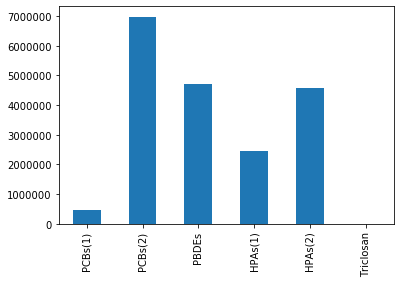

In [15]:
# criar gráficos de barra com os valores encontrados
#Matplotlib


#para o gráfico aparecer logo abaixo é preciso do comando:
%matplotlib inline

#para criar o gráfico
df["BCF"].plot.bar();

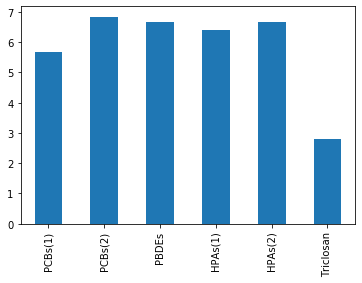

In [6]:
#criar o mesmo tipo de gráfico mas com os valores de logBCF

df["logBCF"].plot.bar();